<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.526865,21.451703,195.904645,272.883214,42.374375,230.508839
1,0.0,1.0,95.697442,74.507930,-3.962386,176.242986,149.363774,26.879212
2,0.0,2.0,96.730146,79.829341,-650.681839,-464.122352,156.023682,-620.146034
3,0.0,3.0,58.725743,36.379802,306.737586,411.843131,71.543590,340.299541
4,0.0,4.0,91.030818,93.994455,-4342.075807,-4147.050535,165.152236,-4312.202771
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,57.633009,37.192934,153.754561,258.580504,18.872456,239.708048
119996,999.0,116.0,84.249253,31.532318,-48.106258,77.675313,-52.661537,130.336850
119997,999.0,117.0,73.049325,69.717025,958.999860,1111.766210,221.729858,890.036351
119998,999.0,118.0,25.280829,20.822455,0.156251,56.259535,-52.824403,109.083938


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.526865,21.451703,195.904645,272.883214,42.374375,230.508839
1,0.0,1.0,95.697442,74.507930,-3.962386,176.242986,149.363774,26.879212
2,0.0,2.0,96.730146,79.829341,-650.681839,-464.122352,156.023682,-620.146034
3,0.0,3.0,58.725743,36.379802,306.737586,411.843131,71.543590,340.299541
4,0.0,4.0,91.030818,93.994455,-4342.075807,-4147.050535,165.152236,-4312.202771
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,57.633009,37.192934,153.754561,258.580504,18.872456,239.708048
119996,999.0,116.0,84.249253,31.532318,-48.106258,77.675313,-52.661537,130.336850
119997,999.0,117.0,73.049325,69.717025,958.999860,1111.766210,221.729858,890.036351
119998,999.0,118.0,25.280829,20.822455,0.156251,56.259535,-52.824403,109.083938


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    45.526865  21.451703   195.904645   272.883214   42.374375   
      1.0    95.697442  74.507930    -3.962386   176.242986  149.363774   
      2.0    96.730146  79.829341  -650.681839  -464.122352  156.023682   
      3.0    58.725743  36.379802   306.737586   411.843131   71.543590   
      4.0    91.030818  93.994455 -4342.075807 -4147.050535  165.152236   
...                ...        ...          ...          ...         ...   
999.0 115.0  57.633009  37.192934   153.754561   258.580504   18.872456   
      116.0  84.249253  31.532318   -48.106258    77.675313  -52.661537   
      117.0  73.049325  69.717025   958.999860  1111.766210  221.729858   
      118.0  25.280829  20.822455     0.156251    56.259535  -52.824403   
      119.0  86.213614  51.408848  -255.298326  -107.675865   80.531677   

                   e_hat  
rep   index               
0.0   0.0     230.508839  
      1.0      26.879212  
      2.0    -620.146034  
      3.0     340.299541  
      4.0   -4312.202771  
...                  ...  
999.0 115.0   239.708048  
      116.0   130.336850  
      117.0   890.036351  
      118.0   109.083938  
      119.0  -188.207541  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    45.526865  21.451703   195.904645   272.883214   42.374375   
      1.0    95.697442  74.507930    -3.962386   176.242986  149.363774   
      2.0    96.730146  79.829341  -650.681839  -464.122352  156.023682   
      3.0    58.725743  36.379802   306.737586   411.843131   71.543590   
      4.0    91.030818  93.994455 -4342.075807 -4147.050535  165.152236   
...                ...        ...          ...          ...         ...   
999.0 115.0  57.633009  37.192934   153.754561   258.580504   18.872456   
      116.0  84.249253  31.532318   -48.106258    77.675313  -52.661537   
      117.0  73.049325  69.717025   958.999860  1111.766210  221.729858   
      118.0  25.280829  20.822455     0.156251    56.259535  -52.824403   
      119.0  86.213614  51.408848  -255.298326  -107.675865   80.531677   

                   e_hat  
rep   index               
0.0   0.0     230.508839  
      1.0      26.879212  
      2.0    -620.146034  
      3.0     340.299541  
      4.0   -4312.202771  
...                  ...  
999.0 115.0   239.708048  
      116.0   130.336850  
      117.0   890.036351  
      118.0   109.083938  
      119.0  -188.207541  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.526865,21.451703,195.904645,272.883214,42.374375,230.508839
1,0.0,1.0,95.697442,74.507930,-3.962386,176.242986,149.363774,26.879212
2,0.0,2.0,96.730146,79.829341,-650.681839,-464.122352,156.023682,-620.146034
3,0.0,3.0,58.725743,36.379802,306.737586,411.843131,71.543590,340.299541
4,0.0,4.0,91.030818,93.994455,-4342.075807,-4147.050535,165.152236,-4312.202771
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,57.633009,37.192934,153.754561,258.580504,18.872456,239.708048
119996,999.0,116.0,84.249253,31.532318,-48.106258,77.675313,-52.661537,130.336850
119997,999.0,117.0,73.049325,69.717025,958.999860,1111.766210,221.729858,890.036351
119998,999.0,118.0,25.280829,20.822455,0.156251,56.259535,-52.824403,109.083938


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    45.526865  21.451703   195.904645   272.883214   42.374375   
      1.0    95.697442  74.507930    -3.962386   176.242986  149.363774   
      2.0    96.730146  79.829341  -650.681839  -464.122352  156.023682   
      3.0    58.725743  36.379802   306.737586   411.843131   71.543590   
      4.0    91.030818  93.994455 -4342.075807 -4147.050535  165.152236   
...                ...        ...          ...          ...         ...   
999.0 115.0  57.633009  37.192934   153.754561   258.580504   18.872456   
      116.0  84.249253  31.532318   -48.106258    77.675313  -52.661537   
      117.0  73.049325  69.717025   958.999860  1111.766210  221.729858   
      118.0  25.280829  20.822455     0.156251    56.259535  -52.824403   
      119.0  86.213614  51.408848  -255.298326  -107.675865   80.531677   

                   e_hat  
rep   index               
0.0   0.0     230.508839  
      1.0      26.879212  
      2.0    -620.146034  
      3.0     340.299541  
      4.0   -4312.202771  
...                  ...  
999.0 115.0   239.708048  
      116.0   130.336850  
      117.0   890.036351  
      118.0   109.083938  
      119.0  -188.207541  

[120000 rows x 6 columns]

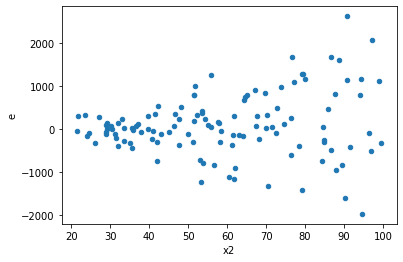

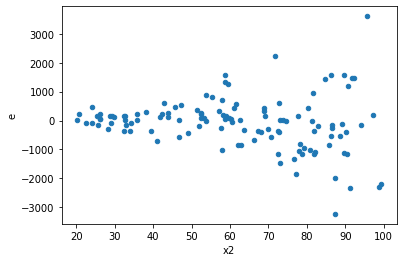

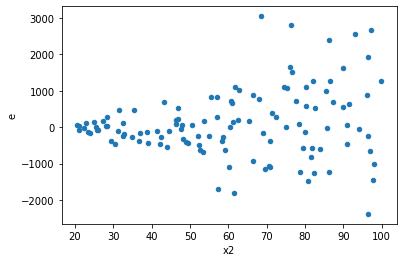

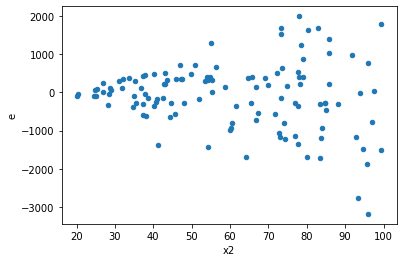

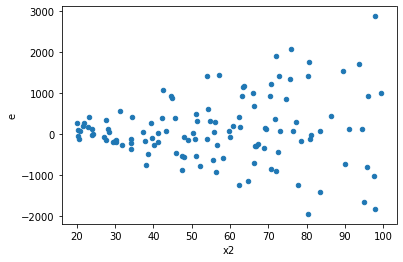

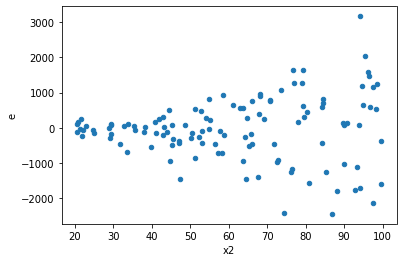

In [16]:
tablenew0 = table.loc[2.0]
tablenew1 = table.loc[3.0]
tablenew2 = table.loc[4.0]
tablenew3 = table.loc[5.0]
tablenew4 = table.loc[6.0]
tablenew5 = table.loc[7.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,16822101.277181808,74905328.35512845,365697.85385177843,1628376.7033723576,4.452792616147968,1.3660561217765377e-06,0.9999993169719391,6.830280608882688e-07,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,5067445.4728444675,46510887.58046918,110161.85810531452,1011106.2517493301,9.178369620297385,6.254108342318432e-12,0.999999999996873,3.127054171159216e-12,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,11018169.545425713,70423364.27471425,239525.42490055898,1530942.7016242228,6.391566583212645,4.0931307232483505e-09,0.9999999979534346,2.0465653616241752e-09,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,9239849.2419019,54300498.357805304,200866.28786743263,1180445.6164740284,5.876773195774379,1.6857429896433018e-08,0.999999991571285,8.428714948216509e-09,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,8753469.292201374,63027690.119567096,190292.81070002986,1370167.1765123282,7.200309730419643,5.168210304162812e-10,0.9999999997415895,2.584105152081406e-10,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,5217984.570678631,57475081.952766165,113434.44718866589,1249458.3033210037,11.014804887644807,1.9473311851925246e-13,0.9999999999999026,9.736655925962623e-14,Reject001=0 : Heteroscedasticity
10.0,46.0,46.0,36740747.58485962,42569299.245609984,798711.9040186873,925419.5488176084,1.1586399854082512,0.6196055566923202,0.6901972216538399,0.3098027783461601,Reject001=1 : Homoscedasticity
11.0,46.0,46.0,27265239.69150175,52781518.135277435,592722.6019891686,1147424.30728864,1.9358538099237323,0.027228392227427234,0.9863858038862864,0.013614196113713617,Reject001=1 : Homoscedasticity
12.0,46.0,46.0,34052343.92588553,47462332.05286308,740268.3462149028,1031789.8272361539,1.3938051417595279,0.26384504939179143,0.8680774753041043,0.13192252469589572,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,16822101.277181808,74905328.35512845,365697.85385177843,1628376.7033723576,4.452792616147968,1.3660561217765377e-06,Reject001=0 : Heteroscedasticity
1.0,46.0,46.0,31708902.07028352,28668279.656303376,689323.9580496418,623223.4707892038,0.9041082404165071,0.7339121175732133,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,5067445.4728444675,46510887.58046918,110161.85810531452,1011106.2517493301,9.178369620297385,6.254108342318432e-12,Reject001=0 : Heteroscedasticity
3.0,46.0,46.0,65610915.250028424,9311202.8495444,1426324.2445658352,202417.45325096522,0.1419154543731253,7.559263689741844e-10,Reject001=0 : Heteroscedasticity
4.0,46.0,46.0,11018169.545425713,70423364.27471425,239525.42490055898,1530942.7016242228,6.391566583212645,4.0931307232483505e-09,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,58137147.45288044,12049944.668819554,1263851.0315843574,261955.3188873816,0.2072675594994734,4.020473600581601e-07,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,9239849.2419019,54300498.357805304,200866.28786743263,1180445.6164740284,5.876773195774379,1.6857429896433018e-08,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,8753469.292201374,63027690.119567096,190292.81070002986,1370167.1765123282,7.200309730419643,5.168210304162812e-10,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,5217984.570678631,57475081.952766165,113434.44718866589,1249458.3033210037,11.014804887644807,1.9473311851925246e-13,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    733
Reject001=1 : Homoscedasticity      267
Name: Result_test, dtype: int64